In [1]:
import pypsa
import pandas as pd
import numpy as np
import os

In [2]:
solver = "cbc"

*** 
Check-point 1:

**Build a network in PyPSA with two nodes (`bus`) and following components to build a simple green hydrogen production system:**

1. An `Hydrogen` bus with hydrogen as `carrier`.
   1. A hydrogen demand load inside this bus.
2. A `Hydrogen_storage` bus with hydrogen as `carrier`.
   1. A hydrogen store inside this bus.
3. A bidirection link to transfar the hydrogen between hydrogen and hydrogen storage buses.


**For simplicity, we assume the hydrogen demand profile to be flat for now. As help you should have a look at the [PyPSA documentation](https://pypsa-readthedocs.readthedocs.io/en/readthedocs/index.html) and the [minimal lopf example](https://www.pypsa.org/examples/minimal_example_lopf.html), understand what the [components documentation](https://pypsa-readthedocs.readthedocs.io/en/readthedocs/components.html) of PyPSA gives you and that you can find the underlying objective function and constraints in the [LOPF documentation](https://pypsa-readthedocs.readthedocs.io/en/readthedocs/optimal_power_flow.html).**


> **Remarks:** For time reasons, you do not have to build the network from scratch. However, to get you acquainted with PyPSA we have omitted a few elements or some of the parameters of the network marked by three question marks `???`. Either, you have to add an element similar to the one in the box above or add a few parameters.

#### Initialize network

In [3]:
# Create empty PyPSA network
network = pypsa.Network()

In [4]:
# Set snapshots to the year 2023 and at hourly resolution
snapshots = pd.date_range("01-01-2023", "01-01-2024", freq="H", inclusive="left")
network.set_snapshots(snapshots)

Add an `hydrogen` bus with hydrogen as `carrier`

In [5]:
network.add(class_name="Bus", name="hydrogen", carrier="hydrogen")

Add an `hydrogen_storage` bus with hydrogen as `carrier`

In [6]:
network.add(class_name="Bus", name="hydrogen_storage", carrier="hydrogen")

Add constant hourly hydrogen load of `10MW` at the hydrogen bus. The name of the load can be `hydroge_load`

In [7]:
network.add(class_name="Load", name="hydrogen_load", bus="hydrogen", p_set=10)

Add a store at the hydrogen_storage bus with a initial energy capacity of `87600MWh`, and marginal cost of `0$/MWh` into the network? The name of the store can be `hydrogen_tank`. 

In [8]:
network.add(
      class_name="Store",
      name="hydrogen_tank",
      bus="hydrogen_storage",
      carrier="hydrogen",
      e_nom_extendable=True,
      e_cyclic=False,
      e_initial=87600, # MWh
      marginal_cost=0, #$/MWh
      )

Add a bidirectional link, representing the hydrogen charging and discharging between hydrogen and hydrogen_storage with marginal cost of `0$/MWh` into the network? The name of the link can be `hydrogen_flow`. 

In [9]:
network.add(
      class_name="Link",
      name="hydrogen_flow",
      bus0="hydrogen",
      bus1="hydrogen_storage",
      p_nom_extendable=True,
      marginal_cost=0, #$/MWh
      efficiency=1,
      p_min_pu=-1
      )

Now try to solve your network

In [10]:
# Solve network using cbc solver
network.optimize(pyomo=False, solver_name="cbc")

INFO:linopy.model: Solve problem using Cbc solver
INFO:linopy.model:Solver options:
 - pyomo: False
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 5/5 [00:00<00:00, 96.82it/s]
INFO:linopy.io: Writing time: 0.34s
INFO:linopy.solvers:Welcome to the CBC MILP Solver 
Version: 2.10.12 
Build Date: Sep  3 2024 

command line - cbc -printingOptions all -import /tmp/linopy-problem-rl11uyjz.lp -pyomo False -solve -solu /tmp/linopy-solve-m5gzsbj5.sol (default strategy 1)
Option for printingOptions changed from normal to all
No match for pyomo - ? for list of commands
No match for False - ? for list of commands
Presolve 0 (-61322) rows, 0 (-26282) columns and 0 (-113881) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 0
After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 0 - 0 iterations time 0.112, Presolve 0.11
Total time (CPU seconds):       2.73   (Wallclock seconds):       0.43


INF

('ok', 'optimal')

Lets look at some results! Back to read the docs. How would you look at results?

<Axes: xlabel='snapshot'>

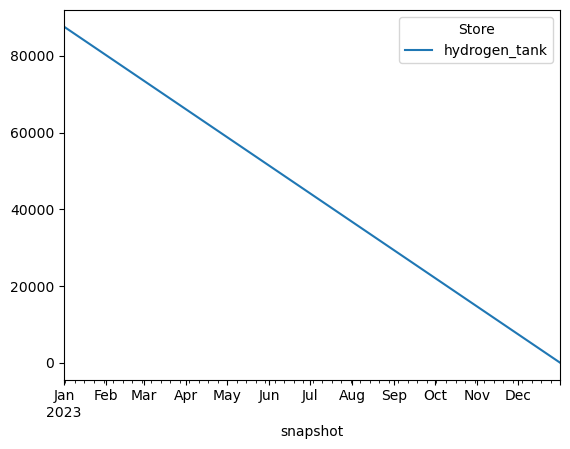

In [11]:
# Inspect the change of hydrogen_tank store to supply loads
network.stores_t.e.plot()

<Axes: xlabel='snapshot'>

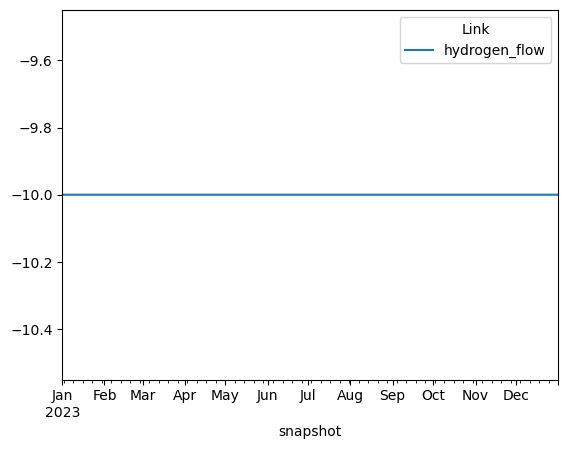

In [12]:
# Inspect the charging flow
network.links_t.p0.plot()

Ending of check-point 1 - export network

In [13]:
# Export network
network.export_to_netcdf("../results/network_d2_e2-1.nc")

INFO:pypsa.io:Exported network network_d2_e2-1.nc has buses, stores, loads, links


<xarray.Dataset> Size: 701kB
Dimensions:                       (snapshots: 8760, investment_periods: 0,
                                   buses_i: 2, stores_i: 1, stores_t_p_i: 1,
                                   stores_t_e_i: 1, loads_i: 1, loads_t_p_i: 1,
                                   links_i: 1, links_t_p0_i: 1, links_t_p1_i: 1)
Coordinates:
  * snapshots                     (snapshots) int64 70kB 0 1 2 ... 8758 8759
  * investment_periods            (investment_periods) int64 0B 
  * buses_i                       (buses_i) object 16B 'hydrogen' 'hydrogen_s...
  * stores_i                      (stores_i) object 8B 'hydrogen_tank'
  * stores_t_p_i                  (stores_t_p_i) object 8B 'hydrogen_tank'
  * stores_t_e_i                  (stores_t_e_i) object 8B 'hydrogen_tank'
  * loads_i                       (loads_i) object 8B 'hydrogen_load'
  * loads_t_p_i                   (loads_t_p_i) object 8B 'hydrogen_load'
  * links_i                       (links_i) object 8B 'hydrogen_flow'
  * links_t_p0_i                  (links_t_p0_i) object 8B 'hydrogen_flow'
  * links_t_p1_i                  (links_t_p1_i) object 8B 'hydrogen_flow'
Data variables: (12/25)
    snapshots_snapshot            (snapshots) datetime64[ns] 70kB 2023-01-01 ...
    snapshots_objective           (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    snapshots_stores              (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    snapshots_generators          (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    investment_periods_objective  (investment_periods) object 0B 
    investment_periods_years      (investment_periods) object 0B 
    ...                            ...
    links_carrier                 (links_i) object 8B 'hydrogen'
    links_p_nom_extendable        (links_i) bool 1B True
    links_p_min_pu                (links_i) float64 8B -1.0
    links_p_nom_opt               (links_i) float64 8B 10.0
    links_t_p0                    (snapshots, links_t_p0_i) float64 70kB -10....
    links_t_p1                    (snapshots, links_t_p1_i) float64 70kB 10.0...
Attributes:
    network__linearized_uc:      0
    network__multi_invest:       0
    network_name:                
    network_objective:           0.0
    network_objective_constant:  0.0
    network_pypsa_version:       0.28.0
    network_srid:                4326
    crs:                         {"_crs": "GEOGCRS[\"WGS 84\",ENSEMBLE[\"Worl...
    meta:                        {}